## Name: Luke Nelson
## Student ID: 5281493709

# <center> Homework 6 </center>

In [181]:
import os
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, hamming_loss, accuracy_score
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier
import sklearn.metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import SpectralClustering
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import paired_distances

### 1. Supervised, Semi-Supervised, and Unsupervised Learning
### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set. This data has two output classes and 30 attributes. Use the first 20% of the positive and negative classes inthe file as the test set and the rest as the training set.

In [120]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
filename = os.path.join(fileDir, '../data/wdbc.data')
filename = os.path.abspath(os.path.realpath(filename))
df=pd.read_csv(filename, header=None)   #Read in the .csv file


In [121]:
header=['ID','Diagnosis']
features=['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
add=[' mean',' standard error',' worst']
for i in add:
    for k in features:
        x=k+i
        header.append(x)

df.columns=header

le = LabelEncoder()
le.fit(df['Diagnosis'])
df['Diagnosis']=le.transform(df['Diagnosis'])

df.head()

,ID,Diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [122]:
#Create Training and Test Sets
B_df=df[df['Diagnosis']==0]    #Class Benign (Class 0)
M_df=df[df['Diagnosis']==1]    #Class Malignant (Class 1)


In [123]:
#Create train and test sets for Benign. Take the first 20%
B_test, B_train, B_label_test, B_label_train=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], test_size=0.80,shuffle=False)

#Create train and test sets for Malignant. Take the first 20%
M_test, M_train, M_label_test, M_label_train=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], test_size=0.80,shuffle=False)

X_train=pd.concat([B_train,M_train])
y_train=pd.concat([B_label_train, M_label_train])

X_test=pd.concat([B_test, M_test])
y_test=pd.concat([B_label_test, M_label_test])


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M=30 times, and use randomly selected train and test data (make sure you use 20% of both the positive and negative classes as the test set). Then compare the average scores (accuracy, precision, recall F1-score, and AUC) that you obtain from each algorithm.

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5-fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

Training Set Confusion Matrix:
 [[283   2]
 [  9 160]]
Test Set Confusion Matrix:
 [[72  0]
 [ 4 39]]
ROC is plotted below:


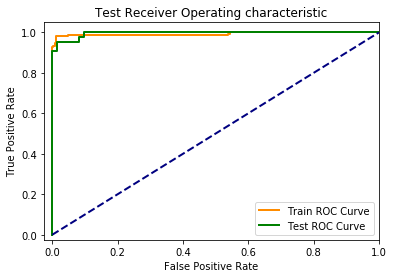

In [125]:
#El Monte Carlo
M=np.arange(1,31,1)

#Training Scores
avg_accuracy_train=list()
avg_precision_train=list()
avg_recall_train=list()
avg_f1_train=list()
avg_AUC_train=list()

#Test Scores
avg_accuracy_test=list()
avg_precision_test=list()
avg_recall_test=list()
avg_f1_test=list()
avg_AUC_test=list()



for num in M:
    
    #######RANDOMLY CREATE TRAINING AND TEST SETS############
    #Create train and test sets for Benign. Take the first 20%
    B_train, B_test, B_label_train, B_label_test=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], train_size=0.80)

    #Create train and test sets for Malignant. Take the first 20%
    M_train, M_test, M_label_train, M_label_test=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], train_size=0.80)

    X_train=pd.concat([B_train,M_train])
    y_train=pd.concat([B_label_train, M_label_train])

    X_test=pd.concat([B_test, M_test])
    y_test=pd.concat([B_label_test, M_label_test])

    #Normalize the data
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    
    
    ###########CV TO FIND BEST C#############
    model = LinearSVC(penalty='l1', dual=False, max_iter=15000, tol=0.001)
    hamming = make_scorer(hamming_loss, greater_is_better=False)
    exact_match=make_scorer(accuracy_score)
    scoring={'exact_match':exact_match, 'hamming_loss':hamming}

    vals=np.logspace(-4,4,base=10,num=8,dtype='float')

    parameters = {
        "C": vals
    }

    model_run = GridSearchCV(model, param_grid=parameters,
                          scoring=scoring, cv=5, n_jobs=-1, refit='exact_match')
    model_run.fit(X_train, y_train)
    
    resultsdf=pd.DataFrame(model_run.cv_results_)
    best_row=resultsdf[resultsdf.rank_test_exact_match == resultsdf.rank_test_exact_match.min()]
    best_C=best_row['param_C']
    best_C=best_C.values[0]
    
    ############RUN ON TRAINING################
    clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000, tol=0.001)
    clf.fit(X_train, y_train)
    train_pred=clf.predict(X_train)
    
    accuracy=accuracy_score(y_train, train_pred)
    precision=metrics.precision_score(y_train, train_pred)
    recall=metrics.recall_score(y_train, train_pred)
    f1=metrics.f1_score(y_train, train_pred)
    AUC=metrics.roc_auc_score(y_train, train_pred)
    
    avg_accuracy_train.append(accuracy)
    avg_precision_train.append(precision)
    avg_recall_train.append(recall)
    avg_f1_train.append(f1)
    avg_AUC_train.append(AUC)
    
    ############RUN ON TEST################
    clf2=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000, tol=0.001)
    clf2.fit(X_train, y_train)
    test_pred=clf2.predict(X_test)
    
    accuracy=accuracy_score(y_test, test_pred)
    precision=metrics.precision_score(y_test, test_pred)
    recall=metrics.recall_score(y_test, test_pred)
    f1=metrics.f1_score(y_test, test_pred)
    AUC=metrics.roc_auc_score(y_test, test_pred)
    
    avg_accuracy_test.append(accuracy)
    avg_precision_test.append(precision)
    avg_recall_test.append(recall)
    avg_f1_test.append(f1)
    avg_AUC_test.append(AUC)
    
    ########print Confusion Matrix and ROC for the last run#############
    if num==30:
        cmat=metrics.confusion_matrix(y_train, train_pred)
        print('Training Set Confusion Matrix:\n',cmat)
        cmat2=metrics.confusion_matrix(y_test, test_pred)
        print('Test Set Confusion Matrix:\n',cmat2)
        
        #Plot the ROC
        probs = clf.decision_function(X_train)
        fpr, tpr, thresholds = metrics.roc_curve(y_train, probs)

        probs2 = clf2.decision_function(X_test)
        fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, probs2)
        print('ROC is plotted below:')

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='Train ROC Curve')
        plt.plot(fpr2, tpr2, color='green',
                 lw=lw, label='Test ROC Curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([-0.025, 1.0])
        plt.ylim([-0.025, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver Operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    else:
        continue
    
    

In [126]:
print('Average Training Set Accuracy:',sum(avg_accuracy_train)/len(avg_accuracy_train))
print('Average Training Set Precision:',sum(avg_precision_train)/len(avg_precision_train))
print('Average Training Set Recall:',sum(avg_recall_train)/len(avg_recall_train))
print('Average Training Set F1-Score:',sum(avg_f1_train)/len(avg_f1_train))
print('Average Training Set AUC:',sum(avg_AUC_train)/len(avg_AUC_train))

print('\nAverage Test Set Accuracy:',sum(avg_accuracy_test)/len(avg_accuracy_test))
print('Average Test Set Precision:',sum(avg_precision_test)/len(avg_precision_test))
print('Average Test Set Recall:',sum(avg_recall_test)/len(avg_recall_test))
print('Average Test Set F1-Score:',sum(avg_f1_test)/len(avg_f1_test))
print('Average Test Set AUC:',sum(avg_AUC_test)/len(avg_AUC_test))

Average Training Set Accuracy: 0.9848017621145377
Average Training Set Precision: 0.9918703797521994
Average Training Set Recall: 0.9670611439842208
Average Training Set F1-Score: 0.979210426559171
Average Training Set AUC: 0.9811913907055609

Average Test Set Accuracy: 0.9675362318840578
Average Test Set Precision: 0.9744405771444712
Average Test Set Recall: 0.9387596899224808
Average Test Set F1-Score: 0.9556596660678717
Average Test Set AUC: 0.9617409560723514


### ii. Semi-Supervised Learning / Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.


### A. Train an L1-penalize SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

#### NOTE: Both questions A and B are combined in the code below as a result of being asked to run a monte carlo on the entire question.

Training Set Confusion Matrix:
 [[286   0]
 [  1 167]]
Test Set Confusion Matrix:
 [[72  0]
 [ 3 40]]
ROC is plotted below:


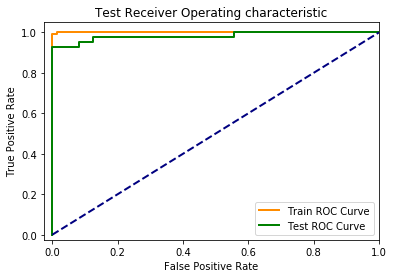

In [127]:
#El Monte Carlo
M=np.arange(1,31,1)

#Training Scores
avg_accuracy_train=list()
avg_precision_train=list()
avg_recall_train=list()
avg_f1_train=list()
avg_AUC_train=list()

#Test Scores
avg_accuracy_test=list()
avg_precision_test=list()
avg_recall_test=list()
avg_f1_test=list()
avg_AUC_test=list()



for num in M:
    ######RANDOMLY CREATE TRAIN AND TEST AND THEN BREAK TRAIN INTO LABELED AND UNLABELED##########
    #Create train and test sets for Benign. Take the first 20%
    B_train, B_test, B_label_train, B_label_test=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], train_size=0.80)

    #Create train and test sets for Malignant. Take the first 20%
    M_train, M_test, M_label_train, M_label_test=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], train_size=0.80)


    B_labeled, B_unlabeled, b_labeled, b_unlabeled=model_selection.train_test_split(B_train,B_label_train, train_size=0.50)
    M_labeled, M_unlabeled, m_labeled, m_unlabeled=model_selection.train_test_split(M_train,M_label_train, train_size=0.50)

    X_labeled=pd.concat([B_labeled,M_labeled])
    y_labeled=pd.concat([b_labeled, m_labeled])

    X_unlabeled=pd.concat([B_unlabeled,M_unlabeled])
    y_unlabeled=pd.concat([b_unlabeled, m_unlabeled])

    X_test=pd.concat([B_test, M_test])
    y_test=pd.concat([B_label_test, M_label_test])



    #Normalize the data
    sc=MinMaxScaler()
    X_labeled=sc.fit_transform(X_labeled)
    X_unlabeled=sc.transform(X_unlabeled)
    X_test=sc.transform(X_test)
    
    ###############CHOOSE THE BEST C####################
    model = LinearSVC(penalty='l1', dual=False, max_iter=15000, tol=0.001)
    hamming = make_scorer(hamming_loss, greater_is_better=False)
    exact_match=make_scorer(accuracy_score)
    scoring={'exact_match':exact_match, 'hamming_loss':hamming}

    vals=np.logspace(-4,4,base=10,num=8,dtype='float')

    parameters = {
        "C": vals
    }

    model_run = GridSearchCV(model, param_grid=parameters,
                          scoring=scoring, cv=5, n_jobs=-1, refit='exact_match')
    model_run.fit(X_labeled, y_labeled)

    resultsdf=pd.DataFrame(model_run.cv_results_)
    best_row=resultsdf[resultsdf.rank_test_exact_match == resultsdf.rank_test_exact_match.min()]
    best_C=best_row['param_C']
    best_C=best_C.values[0]
    
    ############TRAIN SVM and then find furthest distance and add it ##################
    for i in range(len(X_unlabeled)):
        #Train the SVM on the labeled data and find the farthest distance
        clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000, tol=0.001)
        clf.fit(X_labeled, y_labeled)

        distances=clf.decision_function(X_unlabeled)

        #Find the index of the farthest distance from the array
        distances=abs(distances)
        largest_position=np.where(distances == distances.max())
        largest_position=largest_position[0][0]

        to_pred_row=X_unlabeled[largest_position]
        to_pred=to_pred_row.reshape(1, -1)

        #predict what the label is and add the data to X_labeled
        label_pred=clf.predict(to_pred)

        #Add the prediction and the row to X_labeled
        y_labeled = np.append(y_labeled, label_pred, axis=0)
        X_labeled = np.vstack ((X_labeled, to_pred_row))

        #Delete the row from X_unlabeled
        X_unlabeled = np.delete(X_unlabeled, largest_position, axis=0)
        
    ############RUN ON TRAINING################
    clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000, tol=0.001)
    clf.fit(X_labeled, y_labeled)
    train_pred=clf.predict(X_labeled)
    
    accuracy=accuracy_score(y_labeled, train_pred)
    precision=metrics.precision_score(y_labeled, train_pred)
    recall=metrics.recall_score(y_labeled, train_pred)
    f1=metrics.f1_score(y_labeled, train_pred)
    AUC=metrics.roc_auc_score(y_labeled, train_pred)
    
    avg_accuracy_train.append(accuracy)
    avg_precision_train.append(precision)
    avg_recall_train.append(recall)
    avg_f1_train.append(f1)
    avg_AUC_train.append(AUC)
    
    ############RUN ON TEST################
    clf2=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000)
    clf2.fit(X_labeled, y_labeled)
    test_pred=clf2.predict(X_test)
    
    accuracy=accuracy_score(y_test, test_pred)
    precision=metrics.precision_score(y_test, test_pred)
    recall=metrics.recall_score(y_test, test_pred)
    f1=metrics.f1_score(y_test, test_pred)
    AUC=metrics.roc_auc_score(y_test, test_pred)
    
    avg_accuracy_test.append(accuracy)
    avg_precision_test.append(precision)
    avg_recall_test.append(recall)
    avg_f1_test.append(f1)
    avg_AUC_test.append(AUC)
    
    ########print Confusion Matrix and ROC for the last run#############
    if num==30:
        cmat=metrics.confusion_matrix(y_labeled, train_pred)
        print('Training Set Confusion Matrix:\n',cmat)
        cmat2=metrics.confusion_matrix(y_test, test_pred)
        print('Test Set Confusion Matrix:\n',cmat2)
        
        #Plot the ROC
        probs = clf.decision_function(X_labeled)
        fpr, tpr, thresholds = metrics.roc_curve(y_labeled, probs)

        probs2 = clf2.decision_function(X_test)
        fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, probs2)
        print('ROC is plotted below:')

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                 lw=lw, label='Train ROC Curve')
        plt.plot(fpr2, tpr2, color='green',
                 lw=lw, label='Test ROC Curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([-0.025, 1.0])
        plt.ylim([-0.025, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver Operating characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    else:
        continue
    
    
    


In [128]:
print('Average Training Set Accuracy:',sum(avg_accuracy_train)/len(avg_accuracy_train))
print('Average Training Set Precision:',sum(avg_precision_train)/len(avg_precision_train))
print('Average Training Set Recall:',sum(avg_recall_train)/len(avg_recall_train))
print('Average Training Set F1-Score:',sum(avg_f1_train)/len(avg_f1_train))
print('Average Training Set AUC:',sum(avg_AUC_train)/len(avg_AUC_train))

print('\nAverage Test Set Accuracy:',sum(avg_accuracy_test)/len(avg_accuracy_test))
print('Average Test Set Precision:',sum(avg_precision_test)/len(avg_precision_test))
print('Average Test Set Recall:',sum(avg_recall_test)/len(avg_recall_test))
print('Average Test Set F1-Score:',sum(avg_f1_test)/len(avg_f1_test))
print('Average Test Set AUC:',sum(avg_AUC_test)/len(avg_AUC_test))

Average Training Set Accuracy: 0.9960352422907489
Average Training Set Precision: 0.9984006317503389
Average Training Set Recall: 0.9908472012722165
Average Training Set F1-Score: 0.9945851189586037
Average Training Set AUC: 0.9949571001725197

Average Test Set Accuracy: 0.9576811594202899
Average Test Set Precision: 0.9591450979673167
Average Test Set Recall: 0.9279069767441862
Average Test Set F1-Score: 0.9424133852183082
Average Test Set AUC: 0.9516849698535743


### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k=2.

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algorithm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [232]:
#Create train and test sets for Benign. Take the first 20%
B_train, B_test, B_label_train, B_label_test=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], train_size=0.80)

#Create train and test sets for Malignant. Take the first 20%
M_train, M_test, M_label_train, M_label_test=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], train_size=0.80)

X_train=pd.concat([B_train,M_train])
y_train=pd.concat([B_label_train, M_label_train])

X_test=pd.concat([B_test, M_test])
y_test=pd.concat([B_label_test, M_label_test])

#Normalize the data
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [52]:
#KMeans k=2
k_means = KMeans(n_clusters=2, init='random', n_init=100)

#Run the clustering algorithm
model = k_means.fit(X_train)


#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X_train)

#Calculate the CH score
labels = k_means.labels_
labels

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

#### Answer: I've set n_init=100  to make sure that the algorithm is not trapped in a local minimum. Specifying n_init is the "Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia." We would be guaranteed a global minimum if we chose n_init to k^n, however this is not practical in our case since it would be 2^113. According to what I've seen through research, setting n_init=100 is the most practical way to ensure the algorithm is not trapped in a local minimum.

### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matri for one of the runs.

In [132]:
#Compute centers of the two clusters
clusters=k_means.cluster_centers_



array([[1.64254202e-02, 2.51979361e-02, 1.05681225e-01, 6.27154995e-01,
        1.26587974e-04, 1.10237164e-04, 6.85283461e-05, 3.94005291e-05,
        2.37640317e-04, 8.55948871e-05, 4.04798020e-04, 1.86305355e-03,
        2.86269810e-03, 3.06117799e-02, 1.04471179e-05, 2.88663551e-05,
        3.40105846e-05, 1.35030981e-05, 2.81300024e-05, 4.95029092e-06,
        1.81046830e-02, 3.35571265e-02, 1.18126268e-01, 7.59231317e-01,
        1.73356262e-04, 2.52200785e-04, 2.40418628e-04, 1.04074296e-04,
        3.68025062e-04, 1.09622585e-04],
       [1.05537699e-02, 1.40517507e-02, 6.92190768e-02, 5.57474831e-01,
        6.29427500e-05, 8.03076243e-05, 7.86564802e-05, 4.54155658e-05,
        1.19227794e-04, 3.88554601e-05, 2.89939657e-04, 6.23023367e-04,
        2.00404588e-03, 3.21955505e-02, 3.53065746e-06, 1.52193364e-05,
        1.82517299e-05, 7.23845709e-06, 1.01373133e-05, 2.01869047e-06,
        1.28941121e-02, 1.93862278e-02, 8.55118260e-02, 8.20490942e-01,
        9.34656460e-05,

In [145]:
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train, y_train)
clust_predict=neigh.predict(clusters)
clust_predict

array([0, 1])

In [147]:
#0 cluster gets a 0 (for Benign), 1 cluster gets 1 (for Malignant), so we can just go off of the labels. But ill still set it up incase it changes
predicted=list()
for i in labels:
    if i==0:
        x=clust_predict[0]
        predicted.append(x)
    elif i==1:
        x=clust_predict[1]
        predicted.append(x)

predicted=np.array(predicted)
predicted
    





array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [149]:
#Calculate the different errors from predicted vs actual
accuracy=accuracy_score(y_train, predicted)
precision=metrics.precision_score(y_train, predicted)
recall=metrics.recall_score(y_train, predicted)
f1=metrics.f1_score(y_train, predicted)
AUC=metrics.roc_auc_score(y_train, predicted)
AUC

0.8690476190476191

### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-Score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [150]:
neigh2 = KNeighborsClassifier(n_neighbors=1)
neigh2.fit(clusters, clust_predict)
test_pred=neigh2.predict(X_test)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [151]:
#Calculate the different errors from predicted vs actual for Test
accuracy=accuracy_score(y_test, test_pred)
precision=metrics.precision_score(y_test, test_pred)
recall=metrics.recall_score(y_test, test_pred)
f1=metrics.f1_score(y_test, test_pred)
AUC=metrics.roc_auc_score(y_test, test_pred)

0.8660633484162895

#### NOTE: Above were my preporatory steps of going through A-C. Now I have put them together and done everything asked in the monte carlo below:

In [235]:
def softmax(xs):
    return np.exp(xs) / sum(np.exp(xs))

Training Set Confusion Matrix:
 [[273  12]
 [ 25 144]]
Test Set Confusion Matrix:
 [[69  3]
 [ 5 38]]


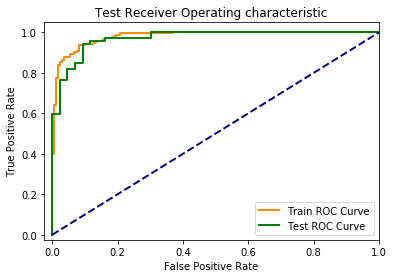

In [236]:
#El Monte
M=np.arange(1,31,1)

#Training Scores
avg_accuracy_train=list()
avg_precision_train=list()
avg_recall_train=list()
avg_f1_train=list()
avg_AUC_train=list()

#Test Scores
avg_accuracy_test=list()
avg_precision_test=list()
avg_recall_test=list()
avg_f1_test=list()
avg_AUC_test=list()



for num in M:
    ##############CREATE TRAIN AND TEST SETS##############
    #Create train and test sets for Benign. Take the first 20%
    B_train, B_test, B_label_train, B_label_test=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], train_size=0.80)

    #Create train and test sets for Malignant. Take the first 20%
    M_train, M_test, M_label_train, M_label_test=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], train_size=0.80)

    X_train=pd.concat([B_train,M_train])
    y_train=pd.concat([B_label_train, M_label_train])

    X_test=pd.concat([B_test, M_test])
    y_test=pd.concat([B_label_test, M_label_test])

    #Normalize the data
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    
    ########SET KMEANS########################
    #Choose the number of k that we decided to get the labels
    k_means = KMeans(n_clusters=2, init='random', n_init=100)

    #Run the clustering algorithm
    model = k_means.fit(X_train)


    #Generate cluster predictions and store in y_hat
    y_hat = k_means.predict(X_train)

    #Calculate the CH score
    labels = k_means.labels_
    
    ##############FIND CENTROIDS AND PREDICT BASED ON MAJORITY VOTE################
    #Compute centers of the two clusters
    clusters=k_means.cluster_centers_
    
    neigh = KNeighborsClassifier(n_neighbors=30)
    neigh.fit(X_train, y_train)
    clust_predict=neigh.predict(clusters)

    predicted=list()
    for i in labels:
        if i==0:
            x=clust_predict[0]
            predicted.append(x)
        elif i==1:
            x=clust_predict[1]
            predicted.append(x)

    predicted=np.array(predicted)
    
    ###########TRAINING ERRORS#################
    #Calculate the different errors from predicted vs actual
    accuracy=accuracy_score(y_train, predicted)
    precision=metrics.precision_score(y_train, predicted)
    recall=metrics.recall_score(y_train, predicted)
    f1=metrics.f1_score(y_train, predicted)
    AUC=metrics.roc_auc_score(y_train, predicted)
    
    avg_accuracy_train.append(accuracy)
    avg_precision_train.append(precision)
    avg_recall_train.append(recall)
    avg_f1_train.append(f1)
    avg_AUC_train.append(AUC)
    
    ##############TEST ERRORS##############
    neigh2 = KNeighborsClassifier(n_neighbors=1)
    neigh2.fit(clusters, clust_predict)
    test_pred=neigh2.predict(X_test)
    
    #Calculate the different errors from predicted vs actual for Test
    accuracy=accuracy_score(y_test, test_pred)
    precision=metrics.precision_score(y_test, test_pred)
    recall=metrics.recall_score(y_test, test_pred)
    f1=metrics.f1_score(y_test, test_pred)
    AUC=metrics.roc_auc_score(y_test, test_pred)
    
    avg_accuracy_test.append(accuracy)
    avg_precision_test.append(precision)
    avg_recall_test.append(recall)
    avg_f1_test.append(f1)
    avg_AUC_test.append(AUC)
    
    
    ############CONFUSION MATRICES AND ROC CURVES##############
    ########print Confusion Matrix and ROC for the last run#############
    if num==30:
        cmat=metrics.confusion_matrix(y_train, predicted)
        print('Training Set Confusion Matrix:\n',cmat)
        cmat2=metrics.confusion_matrix(y_test, test_pred)
        print('Test Set Confusion Matrix:\n',cmat2)
        
        ###TRAIN####
        clusters_dist=list()
        for row in X_train:
            distA=paired_distances(clusters[0].reshape(1,-1), row.reshape(1,-1), metric='euclidean')
            distA=distA[0]
            distB=paired_distances(clusters[1].reshape(1,-1), row.reshape(1,-1), metric='euclidean')
            distB=distB[0]
            clusters_dist.append((distA,distB))

        clusters_pro=list()
        for a in clusters_dist:
            pro=softmax(a)
            pro=[pro[0],pro[1]]
            clusters_pro.append(pro)

        clusters_pro=np.array(clusters_pro)
        fpr, tpr, thresholds = metrics.roc_curve(y_train, clusters_pro[:, 0])

        #######TEST##########
        clusters_dist=list()
        for row in X_test:
            distA=paired_distances(clusters[0].reshape(1,-1), row.reshape(1,-1), metric='euclidean')
            distA=distA[0]
            distB=paired_distances(clusters[1].reshape(1,-1), row.reshape(1,-1), metric='euclidean')
            distB=distB[0]
            clusters_dist.append((distA,distB))

        clusters_pro=list()
        for a in clusters_dist:
            pro=softmax(a)
            pro=[pro[0],pro[1]]
            clusters_pro.append(pro)

        clusters_pro=np.array(clusters_pro)
        fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, clusters_pro[:, 0])





        plt.figure()
        lw = 2
        plt.plot(tpr, fpr, color='darkorange',
                 lw=lw, label='Train ROC Curve')
        plt.plot(tpr2, fpr2, color='green',
                 lw=lw, label='Test ROC Curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([-0.025, 1.0])
        plt.ylim([-0.025, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver Operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

        
    else:
        continue

In [237]:
print('Average Training Set Accuracy:',sum(avg_accuracy_train)/len(avg_accuracy_train))
print('Average Training Set Precision:',sum(avg_precision_train)/len(avg_precision_train))
print('Average Training Set Recall:',sum(avg_recall_train)/len(avg_recall_train))
print('Average Training Set F1-Score:',sum(avg_f1_train)/len(avg_f1_train))
print('Average Training Set AUC:',sum(avg_AUC_train)/len(avg_AUC_train))

print('\nAverage Test Set Accuracy:',sum(avg_accuracy_test)/len(avg_accuracy_test))
print('Average Test Set Precision:',sum(avg_precision_test)/len(avg_precision_test))
print('Average Test Set Recall:',sum(avg_recall_test)/len(avg_recall_test))
print('Average Test Set F1-Score:',sum(avg_f1_test)/len(avg_f1_test))
print('Average Test Set AUC:',sum(avg_AUC_test)/len(avg_AUC_test))

Average Training Set Accuracy: 0.9261380323054329
Average Training Set Precision: 0.9513179221511642
Average Training Set Recall: 0.8451676528599609
Average Training Set F1-Score: 0.8949450433701954
Average Training Set AUC: 0.9096598498217932

Average Test Set Accuracy: 0.9246376811594204
Average Test Set Precision: 0.9477614538461777
Average Test Set Recall: 0.8457364341085275
Average Test Set F1-Score: 0.8931384018194068
Average Test Set AUC: 0.9087478466838932


### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clusters have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proimity to cluster center, because spectral clustering may give you non-convex clusters. Instead, use fit-predict method.

#### Answer: Spectral clustering is a clustering technique, whereby communities of nodes (clusters) are identified based on the edges connecting them. Spectral clustering uses information from the eigenvalues of matrices built from the data. I sourced this information from the following web page:
https://towardsdatascience.com/spectral-clustering-aba2640c0d5b#:~:text=Spectral%20clustering%20is%20a%20technique,non%20graph%20data%20as%20well.

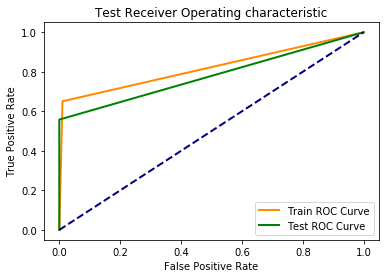

In [179]:
#The Monte Carlo Sim
#El Monte
M=np.arange(1,31,1)

#Training Scores
avg_accuracy_train=list()
avg_precision_train=list()
avg_recall_train=list()
avg_f1_train=list()
avg_AUC_train=list()

#Test Scores
avg_accuracy_test=list()
avg_precision_test=list()
avg_recall_test=list()
avg_f1_test=list()
avg_AUC_test=list()



for num in M:
    #Create train and test sets for Benign. Take the first 20%
    B_train, B_test, B_label_train, B_label_test=model_selection.train_test_split(B_df.iloc[:,2:],B_df.iloc[:,1], train_size=0.80)

    #Create train and test sets for Malignant. Take the first 20%
    M_train, M_test, M_label_train, M_label_test=model_selection.train_test_split(M_df.iloc[:,2:],M_df.iloc[:,1], train_size=0.80)

    X_train=pd.concat([B_train,M_train])
    y_train=pd.concat([B_label_train, M_label_train])

    X_test=pd.concat([B_test, M_test])
    y_test=pd.concat([B_label_test, M_label_test])

    #Normalize the data
    sc=MinMaxScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    
    #############TRAINING####################
    #set up the spectral clustering
    spectral = SpectralClustering(n_clusters=2, gamma=1.0, affinity='rbf', n_init=100)

    #Run the clustering algorithm
    cluster_assignment = spectral.fit_predict(X_train)
    
    #Add the true label column to the cluster assignment column
    mode_arr={'Actual_Label':y_train, 'Cluster_Assignment':cluster_assignment}
    mode_arr=pd.DataFrame(mode_arr)
    
    #For 0 cluster, find the mode of the actual label
    cluster_0 = mode_arr[mode_arr['Cluster_Assignment']== 0]
    cluster_0_mode=stats.mode(cluster_0['Actual_Label'].values)
    cluster_0_mode=cluster_0_mode[0][0]

    #For 1 cluster, find the mode of the actual label
    cluster_1 = mode_arr[mode_arr['Cluster_Assignment']== 1]
    cluster_1_mode=stats.mode(cluster_1['Actual_Label'].values)
    cluster_1_mode=cluster_1_mode[0][0]
    
    #Make an array of predicted class based on the mode cluster class
    train_pred=list()
    for i in cluster_assignment:
        if i==0:
            x=cluster_0_mode
        elif i==1:
            x=cluster_1_mode
        train_pred.append(x)
        
    #Calculate metrics
    #Calculate the different errors from predicted vs actual
    accuracy=accuracy_score(y_train, train_pred)
    precision=metrics.precision_score(y_train, train_pred)
    recall=metrics.recall_score(y_train, train_pred)
    f1=metrics.f1_score(y_train, train_pred)
    AUC=metrics.roc_auc_score(y_train, train_pred)
    
    avg_accuracy_train.append(accuracy)
    avg_precision_train.append(precision)
    avg_recall_train.append(recall)
    avg_f1_train.append(f1)
    avg_AUC_train.append(AUC)
    
    ##################TESTING##################
    #Classify the test data
    X_Whole=np.concatenate((X_train, X_test))
    y_Whole=np.concatenate((y_train, y_test))

    #set up the spectral clustering
    spectral2 = SpectralClustering(n_clusters=2, gamma=1.0, affinity='rbf', n_init=100)

    #Run the clustering algorithm
    cluster_assignment2 = spectral2.fit_predict(X_Whole)

    #Add the true label column to the cluster assignment column
    mode_arr2={'Actual_Label':y_Whole, 'Cluster_Assignment':cluster_assignment2}
    mode_arr2=pd.DataFrame(mode_arr2)

    #For 0 cluster, find the mode of the actual label for just the training set
    cluster_02 = mode_arr2[mode_arr2['Cluster_Assignment']== 0]
    cluster_02_mode=stats.mode(cluster_02['Actual_Label'].iloc[:X_train.shape[0]].values)
    cluster_02_mode=cluster_02_mode[0][0]

    #For 1 cluster, find the mode of the actual label for just the training set
    cluster_12 = mode_arr2[mode_arr2['Cluster_Assignment']== 1]
    cluster_12_mode=stats.mode(cluster_12['Actual_Label'].iloc[:X_train.shape[0]].values)
    cluster_12_mode=cluster_12_mode[0][0]

    #Make an array of predicted class based on the mode cluster class
    cluster_assignment2=cluster_assignment2[X_train.shape[0]:]
    test_pred=list()
    for i in cluster_assignment2:
        if i==0:
            x=cluster_02_mode
        elif i==1:
            x=cluster_12_mode
        test_pred.append(x)

    #Calculate metrics
    #Calculate the different errors from predicted vs actual
    accuracy=accuracy_score(y_test, test_pred)
    precision=metrics.precision_score(y_test, test_pred)
    recall=metrics.recall_score(y_test, test_pred)
    f1=metrics.f1_score(y_test, test_pred)
    AUC=metrics.roc_auc_score(y_test, test_pred)

    avg_accuracy_test.append(accuracy)
    avg_precision_test.append(precision)
    avg_recall_test.append(recall)
    avg_f1_test.append(f1)
    avg_AUC_test.append(AUC)
    
    if num==30:
        #Create the ROC.
        threshold=np.arange(0,1.1,.025)

        cluster_0_roc_pred=list()
        cluster_1_roc_pred=list()

        for t in threshold:
            #For 0 cluster, find the mode of the actual label
            cluster_0 = mode_arr[mode_arr['Cluster_Assignment']== 0]
            count=list(cluster_0['Actual_Label'].values).count(1)
            length=len(cluster_0['Actual_Label'].values)
            if count/length >= t:
                classify=1
            else:
                classify=0

            cluster_0_roc_pred.append(classify)

            #For 1 cluster, find the mode of the actual label
            cluster_1 = mode_arr[mode_arr['Cluster_Assignment']== 1]
            count2=list(cluster_1['Actual_Label'].values).count(1)
            length2=len(cluster_1['Actual_Label'].values)
            if count2/length2 >= t:
                classify2=1
            else:
                classify2=0

            cluster_1_roc_pred.append(classify2)
            
        #Dataframe of the threshold and the class assignment
        #NOTE: this is the threshold for the positive class
        ROC_pd={'Threshold':threshold,'Cluster_0_Assignment':cluster_0_roc_pred,'Cluster_1_Assignment':cluster_1_roc_pred}
        ROC_pd=pd.DataFrame(ROC_pd)
        
        #Calculate the tpr and fpr for these thresholds???????
        fprs=list()
        tprs=list()

        thresher=np.arange(0,43,1)
        for thresh in thresher:
            thresh_pred=list()
            for i in cluster_assignment:
                if i==0:
                    x=ROC_pd.iloc[thresh][0]
                elif i==1:
                    x=ROC_pd.iloc[thresh][1]
                thresh_pred.append(x)
            cmat3=metrics.confusion_matrix(y_train, thresh_pred)

            #print(thresh_pred)
            fpr=(cmat3[0][1])/(cmat3[0][1]+cmat3[0][0])
            tpr=(cmat3[1][1])/(cmat3[1][1]+cmat3[1][0])
            fprs.append(fpr)
            tprs.append(tpr)
            
        #Create the ROC for TEST
        threshold=np.arange(0,1.1,.025)

        cluster_02_roc_pred=list()
        cluster_12_roc_pred=list()

        for t in threshold:
            #For 0 cluster, find the mode of the actual label
            cluster_02 = mode_arr2[mode_arr2['Cluster_Assignment']== 0]
            count=list(cluster_02['Actual_Label'].iloc[:X_train.shape[0]].values).count(1)
            length=len(cluster_02['Actual_Label'].iloc[:X_train.shape[0]].values)
            if count/length >= t:
                classify=1
            else:
                classify=0

            cluster_02_roc_pred.append(classify)

            #For 1 cluster, find the mode of the actual label
            cluster_12 = mode_arr2[mode_arr2['Cluster_Assignment']== 1]
            count2=list(cluster_12['Actual_Label'].iloc[:X_train.shape[0]].values).count(1)
            length2=len(cluster_12['Actual_Label'].iloc[:X_train.shape[0]].values)
            if count2/length2 >= t:
                classify2=1
            else:
                classify2=0

            cluster_12_roc_pred.append(classify2)

        ROC2_pd={'Threshold':threshold,'Cluster_0_Assignment':cluster_02_roc_pred,'Cluster_1_Assignment':cluster_12_roc_pred}
        ROC2_pd=pd.DataFrame(ROC2_pd)

        fprs2=list()
        tprs2=list()

        thresher=np.arange(0,43,1)
        for thresh in thresher:
            thresh_pred2=list()
            for i in cluster_assignment2:
                if i==0:
                    x=ROC2_pd.iloc[thresh][0]
                elif i==1:
                    x=ROC2_pd.iloc[thresh][1]
                thresh_pred2.append(x)
            cmat4=metrics.confusion_matrix(y_test, thresh_pred2)

            #print(thresh_pred)
            fpr2=(cmat4[0][1])/(cmat4[0][1]+cmat4[0][0])
            tpr2=(cmat4[1][1])/(cmat4[1][1]+cmat4[1][0])
            fprs2.append(fpr2)
            tprs2.append(tpr2)
            
        plt.figure()
        lw = 2
        plt.plot(fprs, tprs, color='darkorange',
                 lw=lw, label='Train ROC Curve')
        plt.plot(fprs2, tprs2, color='green',
                 lw=lw, label='Test ROC Curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Test Receiver Operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

    

        
    else:
        continue
    




In [180]:
print('Average Training Set Accuracy:',sum(avg_accuracy_train)/len(avg_accuracy_train))
print('Average Training Set Precision:',sum(avg_precision_train)/len(avg_precision_train))
print('Average Training Set Recall:',sum(avg_recall_train)/len(avg_recall_train))
print('Average Training Set F1-Score:',sum(avg_f1_train)/len(avg_f1_train))
print('Average Training Set AUC:',sum(avg_AUC_train)/len(avg_AUC_train))

print('\nAverage Test Set Accuracy:',sum(avg_accuracy_test)/len(avg_accuracy_test))
print('Average Test Set Precision:',sum(avg_precision_test)/len(avg_precision_test))
print('Average Test Set Recall:',sum(avg_recall_test)/len(avg_recall_test))
print('Average Test Set F1-Score:',sum(avg_f1_test)/len(avg_f1_test))
print('Average Test Set AUC:',sum(avg_AUC_test)/len(avg_AUC_test))

Average Training Set Accuracy: 0.8576358296622612
Average Training Set Precision: 0.9822407218496353
Average Training Set Recall: 0.6291913214990138
Average Training Set F1-Score: 0.7659522138173892
Average Training Set AUC: 0.8111453683518463

Average Test Set Accuracy: 0.8414492753623187
Average Test Set Precision: 0.9828808991749455
Average Test Set Recall: 0.5868217054263564
Average Test Set F1-Score: 0.725690117924918
Average Test Set AUC: 0.7901701119724375


### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

#### Answer: The above was true and held when observing the results I obtained for each of the learning types in question 1. Supervised learning resulted in the best train/test accuracy/scores, followed by semi-supervised, and then followed vy unsupervised.

### 2. Active Learning Using Support Vector Machines
### (a) Download the banknote authentication Data Set. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. this is a binary classification problem.

In [71]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
filename2 = os.path.join(fileDir, '../data/data_banknote_authentication.csv')
filename2 = os.path.abspath(os.path.realpath(filename2))
df2=pd.read_csv(filename2, header=None)   #Read in the .csv file
df2.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [225]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(df2.iloc[:,:4],df2.iloc[:,4], test_size=472, random_state=7)


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 pints. Do NOT replace the smaples back into the training set at each step. Calcluate the test error for each SVM. You will have 90 SVMs that were trained using 0,20,30,...,900 data points and their 90 test errors. You have implemented passive learning.

In [229]:
#el Monte
M=np.arange(1,51,1)

test_errors_50=list()

passive_dct=dict()
for z in np.arange(1,91,1):
    passive_dct[z]=[]

for num in M:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(df2.iloc[:,:4],df2.iloc[:,4], test_size=472, random_state=7)

    rando=np.arange(1,91,1)
    X_passive=np.empty((0, 4), int)
    y_passive = np.array(list())
    y_passive=y_passive.astype(int)
    test_errors=list()

    for rand in rando:
        if len(y_train)==900:
            while True:
                X_10, X_train, y_10, y_train=model_selection.train_test_split(X_train,y_train, train_size=10, random_state=7)
                if list(y_10).count(1)==5:
                    X_passive=np.concatenate((X_passive,X_10), axis=0)
                    y_passive=np.concatenate((y_passive, y_10), axis=0)
                    break
                else:
                    continue
        
        elif len(y_train)>10:
            #I'm uisng train test split to do this 
            X_10, X_train, y_10, y_train=model_selection.train_test_split(X_train,y_train, train_size=10, random_state=7)

            X_passive=np.concatenate((X_passive,X_10), axis=0)
            y_passive=np.concatenate((y_passive, y_10), axis=0)

        else:
            X_passive=np.concatenate((X_passive,X_train), axis=0)
            y_passive=np.concatenate((y_passive, y_train), axis=0)

        #CV 5 SVM train
        model = LinearSVC(penalty='l1', dual=False, max_iter=10000, tol=0.001)
        hamming = make_scorer(hamming_loss, greater_is_better=False)
        exact_match=make_scorer(accuracy_score)
        scoring={'exact_match':exact_match, 'hamming_loss':hamming}

        vals=np.logspace(-4,4,base=10,num=8,dtype='float')

        parameters = {
            "C": vals
        }


        model_run = GridSearchCV(model, param_grid=parameters,
                                  scoring=scoring, cv=5, n_jobs=-1, refit='exact_match')

        model_run.fit(X_passive, y_passive)

        #Find best C param
        resultsdf=pd.DataFrame(model_run.cv_results_)
        best_row=resultsdf[resultsdf.rank_test_exact_match == resultsdf.rank_test_exact_match.min()]
        best_C=best_row['param_C']
        best_C=best_C.values[0]

        #Determine test error (as 1-accuracy_score)
        clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=15000, tol=0.001)
        clf.fit(X_passive, y_passive)
        test_pred=clf.predict(X_test)

        test_err=1-accuracy_score(y_test, test_pred)
        test_errors.append(test_err)
        passive_dct[rand].append(test_err)

    avg_test_error=sum(test_errors)/len(test_errors)
    test_errors_50.append(avg_test_error)


In [230]:
print('Here are the 50 test errors:',test_errors_50)
print('\nHere is the average of the 50 test errors:', sum(test_errors_50)/len(test_errors_50))
print('\nHere is a dictionary of the test errors given the number of training instances:',passive_dct)

Here are the 50 test errors: [0.013159133709981155, 0.012994350282485866, 0.013135593220338975, 0.012994350282485866, 0.012994350282485866, 0.012994350282485866, 0.013159133709981155, 0.013159133709981155, 0.013017890772128051, 0.01311205273069679, 0.013088512241054603, 0.01297080979284368, 0.013017890772128051, 0.01297080979284368, 0.013159133709981155, 0.013088512241054603, 0.013088512241054603, 0.013064971751412418, 0.013088512241054603, 0.013159133709981155, 0.01311205273069679, 0.01311205273069679, 0.013017890772128051, 0.013088512241054603, 0.013135593220338975, 0.013135593220338975, 0.013159133709981155, 0.013088512241054603, 0.013159133709981155, 0.013017890772128051, 0.012947269303201494, 0.01311205273069679, 0.01297080979284368, 0.013135593220338975, 0.013159133709981155, 0.01311205273069679, 0.013159133709981155, 0.013159133709981155, 0.01311205273069679, 0.013041431261770233, 0.013017890772128051, 0.013017890772128051, 0.013064971751412418, 0.013017890772128051, 0.013159133

### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1-penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add the to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10,20,30,...,900 data points and their 90 test errors. You have implemented active learning.

In [242]:
#el Monte del Activa
M=np.arange(1,51,1)

test_errors2_50=list()

active_dct=dict()
for z in np.arange(1,91,1):
    active_dct[z]=[]

for num in M:
    X_train, X_test, y_train, y_test=model_selection.train_test_split(df2.iloc[:,:4],df2.iloc[:,4], test_size=472, random_state=7)
    test_errors2=list()

    #Make sure you see both classes in the randomly selected
    while True:
        X_10, X_train_new, y_10, y_train_new=model_selection.train_test_split(X_train,y_train, train_size=10, random_state=7)
        if len(set(y_10))==2:
            X_active=X_10
            y_active=y_10
            y_train_new=np.array(y_train_new)
            X_train_new=np.array(X_train_new)
            break
        else:
            continue

    rando=np.arange(1,91,1)
    for rand in rando:
        if rand <90:
            #Find the best params with these 10 randomly selected        
            model = LinearSVC(penalty='l1', dual=False, max_iter=10000, tol=0.001)
            hamming = make_scorer(hamming_loss, greater_is_better=False)
            exact_match=make_scorer(accuracy_score)
            scoring={'exact_match':exact_match, 'hamming_loss':hamming}

            vals=np.logspace(-4,4,base=10,num=8,dtype='float')

            parameters = {
                "C": vals
            }


            model_run = GridSearchCV(model, param_grid=parameters,
                                      scoring=scoring, cv=5, n_jobs=-1, refit='exact_match')

            model_run.fit(X_active, y_active)

            #Find best C param
            resultsdf=pd.DataFrame(model_run.cv_results_)
            best_row=resultsdf[resultsdf.rank_test_exact_match == resultsdf.rank_test_exact_match.min()]
            best_C=best_row['param_C']
            best_C=best_C.values[0]
            
            #CReate model and fit it
            #Determine test error (as 1-accuracy_score)
            clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=10000, tol=0.001)
            clf.fit(X_active, y_active)
            test_pred=clf.predict(X_test)

            test_err=1-accuracy_score(y_test, test_pred)
            test_errors2.append(test_err)
            active_dct[rand].append(test_err)

            #Find the 10 closest data points 
            #Find the index values of the 10 closest points to the hyperplane
            #Distances of all observations from the hyperplane
            hyp_distances=model_run.decision_function(X_train_new)
            hyp_distances=abs(hyp_distances)

            #Index values of 10 closest observations to the hyperplane
            closest_10_indexes=hyp_distances.argsort()[:10]

            #Observations from the training to be added to the pool
            X_to_add=X_train_new[closest_10_indexes,:]
            y_to_add=y_train_new[closest_10_indexes]

            #Adding these observations to the pool
            y_active=np.append(y_active, y_to_add, axis=0)
            X_active=np.vstack ((X_active, X_to_add))

            #Deleting these observations from the training sets
            X_train_new = np.delete(X_train_new, closest_10_indexes, axis=0)
            y_train_new=np.delete(y_train_new, closest_10_indexes, axis=0)

        else:
            #Find the best params with these 10 randomly selected        
            model = LinearSVC(penalty='l1', dual=False, max_iter=10000, tol=0.001)
            hamming = make_scorer(hamming_loss, greater_is_better=False)
            exact_match=make_scorer(accuracy_score)
            scoring={'exact_match':exact_match, 'hamming_loss':hamming}

            vals=np.logspace(-4,4,base=10,num=8,dtype='float')

            parameters = {
                "C": vals
            }


            model_run = GridSearchCV(model, param_grid=parameters,
                                      scoring=scoring, cv=5, n_jobs=-1, refit='exact_match')

            model_run.fit(X_active, y_active)

            #Find best C param
            resultsdf=pd.DataFrame(model_run.cv_results_)
            best_row=resultsdf[resultsdf.rank_test_exact_match == resultsdf.rank_test_exact_match.min()]
            best_C=best_row['param_C']
            best_C=best_C.values[0]
            
            
            #CReate model and fit it
            #Determine test error (as 1-accuracy_score)
            clf=LinearSVC(penalty='l1', dual=False, C=best_C, max_iter=10000, tol=0.001)
            clf.fit(X_active, y_active)
            test_pred=clf.predict(X_test)

            test_err=1-accuracy_score(y_test, test_pred)
            test_errors2.append(test_err)
            active_dct[rand].append(test_err)
            
    avg_test_error2=sum(test_errors2)/len(test_errors2)
    test_errors2_50.append(avg_test_error2)
    #print('Just finished iteration number:',num)

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packa

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lukenelson/anaconda3/lib/python3.6/site-packa

In [243]:
print('Here are the 50 test errors:',test_errors2_50)
print('\nHere is the average of the 50 test errors:', sum(test_errors2_50)/len(test_errors2_50))
print('\nHere is a dictionary of the test errors given the number of training instances:',active_dct)

Here are the 50 test errors: [0.012664783427495281, 0.012664783427495281, 0.01471280602636535, 0.012664783427495281, 0.013323917137476446, 0.012570621468926542, 0.012688323917137466, 0.012641242937853094, 0.012664783427495281, 0.012664783427495281, 0.013512241054613922, 0.012735404896421833, 0.013653483992467037, 0.012782485875706203, 0.012688323917137466, 0.01327683615819208, 0.012641242937853094, 0.013370998116760818, 0.012617702448210909, 0.012664783427495281, 0.012664783427495281, 0.014665725047080974, 0.014430320150659136, 0.01426553672316384, 0.01348870056497174, 0.013441619585687375, 0.012758945386064018, 0.012711864406779651, 0.015536723163841816, 0.013253295668549894, 0.012641242937853094, 0.013300376647834261, 0.012688323917137466, 0.013370998116760818, 0.01311205273069679, 0.013794726930320135, 0.012688323917137466, 0.01327683615819208, 0.012711864406779651, 0.014430320150659131, 0.01327683615819208, 0.014312617702448207, 0.015136534839924673, 0.012758945386064018, 0.0132062

### (c) Average teh 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here you are actually obtaining a learning curve by Monte-Carlo simulation.

In [79]:
print('Here is the average of the 50 test errors for the Passive Learner:', sum(test_errors_50)/len(test_errors_50))
print('Here is the average of the 50 test errors for the Active Learner:', sum(test_errors2_50)/len(test_errors2_50))

Here is the average of the 50 test errors for the Passive Learner: 0.013457627118644072
Here is the average of the 50 test errors for the Active Learner: 0.016873822975517892


In [81]:
num_of_instances=list()
active_lst=list()
passive_lst=list()

avg_passive_dct=dict()
for a,b in passive_dct.items():
    a=a*10
    b=sum(b)/len(b)
    avg_passive_dct[a]=b
    num_of_instances.append(a)
    passive_lst.append(b)
    
avg_active_dct=dict()
for a,b in active_dct.items():
    a=a*10
    b=sum(b)/len(b)
    avg_active_dct[a]=b
    active_lst.append(b)
    
print('Here is the average of the 50 test errors given the number of training instances for the Passive Learner:',avg_passive_dct)
print('\nHere is the average of the 50 test errors given the number of training instances for the Active Learner:',avg_active_dct)



Here is the average of the 50 test errors given the number of training instances for the Passive Learner: {10: 0.09466101694915252, 20: 0.044491525423728806, 30: 0.05084745762711855, 40: 0.03601694915254239, 50: 0.02330508474576276, 60: 0.02330508474576276, 70: 0.025423728813559344, 80: 0.02118644067796616, 90: 0.016949152542372836, 100: 0.016949152542372836, 110: 0.010593220338983023, 120: 0.010593220338983023, 130: 0.010593220338983023, 140: 0.012711864406779627, 150: 0.012711864406779627, 160: 0.016949152542372836, 170: 0.010593220338983023, 180: 0.010593220338983023, 190: 0.010593220338983023, 200: 0.010593220338983023, 210: 0.010593220338983023, 220: 0.010593220338983023, 230: 0.010593220338983023, 240: 0.004237288135593209, 250: 0.004237288135593209, 260: 0.004237288135593209, 270: 0.010593220338983023, 280: 0.010593220338983023, 290: 0.010593220338983023, 300: 0.010593220338983023, 310: 0.010593220338983023, 320: 0.010593220338983023, 330: 0.010593220338983023, 340: 0.0105932203

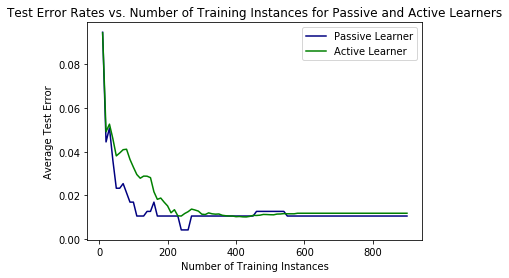

In [244]:
passive_lists = sorted(avg_passive_dct.items()) # sorted by key, return a list of tuples
active_lists = sorted(avg_active_dct.items())

x, y = zip(*passive_lists) # unpack a list of pairs into two tuples
j, k = zip(*active_lists)

plt.plot(x, y, color='navy', label='Passive Learner')
plt.plot(j, k, color='green', label='Active Learner')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Test Error Rates vs. Number of Training Instances for Passive and Active Learners')
plt.legend(loc="upper right")
plt.show()

#### Conclusions: For both the Active and Passive Learners, as the number of training instances increased, the average test error decreased. At around 370 training instances, there was no additional benefit in accuracy from increaseing the number of training instances. For the Passive Learner, Average Test Error decreased more quickly as the number of training instances increased than for the Active Learner - thus, the Passive Learner outperforms the active learner when the number of training instances is ~ less than 380.